In [2]:
'''
@author: Manit Mishra
updated 6/17/2023 working with python 3.11
CIS051

The data in this dataset is from the U.S. Census survey around the housing area around Boston MA:
CRIM - per capita crime rate by town, range from 
ZN - proportion of residential land zoned for lots over 25,000 sq.ft., range from 
INDUS - proportion of non-retail business acres per town., range from 
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise), range from 
NOX - nitric oxides concentration (parts per 10 million), range from 
RM - average number of rooms per dwelling, range from 
AGE - proportion of owner-occupied units built prior to 1940, range from 
DIS - weighted distances to five Boston employment centres, range from 
RAD - index of accessibility to radial highways, range from 
TAX - full-value property-tax rate per $10,000, range from 
PTRATIO - pupil-teacher ratio by town, range from
BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, range from
LSTAT - % lower status of the population, range from
MEDV - Median value of owner-occupied homes in $1000's, range from 
'''

import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

filePath = 'C:/Users/manit/Desktop/Intro to ML Mission College/EDA Week 1/'
filename = 'boston.csv'
data = read_csv(filePath+filename)
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','RH','TAX','PTRATIO','BLACK','LSTAT','MEDV']

data1 = data.drop(data.columns[0], axis=1) 
# save features as pandas dataframe for stepwise feature selection
X1 = data1.drop(data1.columns[13], axis = 1)
Y1 = data1.drop(data1.columns[0:13], axis = 1)

array = data1.values
X = array[:,0:13]
Y = array[:,13]

X1names = X1.columns

peek = data1.head(20)
#print(peek)

In [30]:
set_option('display.width', 100)
description = data1.describe()
print(description)

             crim          zn       indus        chas         nox          rm         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              dis         rad         tax     ptratio       black       lstat        medv  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506

<Figure size 432x288 with 0 Axes>

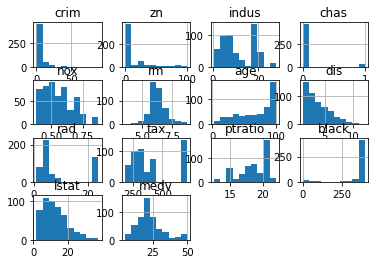

In [31]:
plt.figure() # new plot
data1.hist()
plt.show()

In [36]:
NUM_FEATURES = 6 # this is kind of arbitrary but you should get an idea by observing the scatter plots and correlation.

#14 gave 0.7406
#13 gave 0.7406
#12 gave 0.7406
#11 gave 0.734267
#10 gave 0.72829
#9 gave 0.724344
#8 gave 0.7232588
#7 gave 0.717145
#6 gave 0.71577
#5 gave 0.6336

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=NUM_FEATURES)
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(X,Y)
print("Model Score with selected features is: ", score)

Num Features: 6
Selected Features: [False False False  True  True  True False  True False False  True False
  True]
Feature Ranking: [3 5 4 1 1 1 8 1 2 6 1 7 1]
Model Score with selected features is:  0.7157742117396082


In [26]:
scaler1 = StandardScaler().fit(X1)
rescaledX1 = scaler1.transform(X1)

set_printoptions(precision=3)
print(rescaledX1[0:5,:])

[[-0.42   0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]
 [-0.417 -0.488 -0.593 -0.273 -0.74   0.194  0.367  0.557 -0.868 -0.987
  -0.303  0.441 -0.492]
 [-0.417 -0.488 -0.593 -0.273 -0.74   1.283 -0.266  0.557 -0.868 -0.987
  -0.303  0.396 -1.209]
 [-0.417 -0.488 -1.307 -0.273 -0.835  1.016 -0.81   1.078 -0.753 -1.106
   0.113  0.416 -1.362]
 [-0.412 -0.488 -1.307 -0.273 -0.835  1.229 -0.511  1.078 -0.753 -1.106
   0.113  0.441 -1.027]]


In [27]:
scaler = Normalizer().fit(X1)
normalizedX = scaler.transform(X1)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX[0:5,:])


[[1.26388e-05 3.59967e-02 4.61957e-03 0.00000e+00 1.07590e-03 1.31488e-02
  1.30388e-01 8.17925e-03 1.99982e-03 5.91945e-01 3.05972e-02 7.93727e-01
  9.95908e-03]
 [5.78530e-05 0.00000e+00 1.49770e-02 0.00000e+00 9.93521e-04 1.36021e-02
  1.67140e-01 1.05222e-02 4.23676e-03 5.12648e-01 3.77072e-02 8.40785e-01
  1.93620e-02]
 [5.85730e-05 0.00000e+00 1.51745e-02 0.00000e+00 1.00662e-03 1.54213e-02
  1.31140e-01 1.06610e-02 4.29263e-03 5.19409e-01 3.82044e-02 8.43138e-01
  8.64966e-03]
 [7.10490e-05 0.00000e+00 4.78489e-03 0.00000e+00 1.00527e-03 1.53599e-02
  1.00527e-01 1.33059e-02 6.58471e-03 4.87268e-01 4.10447e-02 8.66174e-01
  6.45301e-03]
 [1.50597e-04 0.00000e+00 4.75453e-03 0.00000e+00 9.98888e-04 1.55875e-02
  1.18209e-01 1.32215e-02 6.54294e-03 4.84177e-01 4.07843e-02 8.65631e-01
  1.16246e-02]]


In [37]:
scaler2 = MinMaxScaler().fit(X1)
normalizedX2 = scaler2.transform(X1)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX2[0:5,:])

[[0.00000e+00 1.80000e-01 6.78152e-02 0.00000e+00 3.14815e-01 5.77505e-01
  6.41607e-01 2.69203e-01 0.00000e+00 2.08015e-01 2.87234e-01 1.00000e+00
  8.96799e-02]
 [2.35923e-04 0.00000e+00 2.42302e-01 0.00000e+00 1.72840e-01 5.47998e-01
  7.82698e-01 3.48962e-01 4.34783e-02 1.04962e-01 5.53191e-01 1.00000e+00
  2.04470e-01]
 [2.35698e-04 0.00000e+00 2.42302e-01 0.00000e+00 1.72840e-01 6.94386e-01
  5.99382e-01 3.48962e-01 4.34783e-02 1.04962e-01 5.53191e-01 9.89737e-01
  6.34658e-02]
 [2.92796e-04 0.00000e+00 6.30499e-02 0.00000e+00 1.50206e-01 6.58555e-01
  4.41813e-01 4.48545e-01 8.69565e-02 6.67939e-02 6.48936e-01 9.94276e-01
  3.33885e-02]
 [7.05070e-04 0.00000e+00 6.30499e-02 0.00000e+00 1.50206e-01 6.87105e-01
  5.28321e-01 4.48545e-01 8.69565e-02 6.67939e-02 6.48936e-01 1.00000e+00
  9.93377e-02]]


In [6]:
dataNormDf = pd.DataFrame(rescaledX1, columns = X1names)

set_option('display.width', 110)
#set_option('precision', 1)
descriptionNorm = dataNormDf.describe()
print(descriptionNorm)

               crim            zn         indus          chas           nox            rm           age  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17 -1.965929e-16 -1.088282e-16 -1.474446e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00 -3.880249e+00 -2.335437e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01 -5.686303e-01 -8.374480e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01 -1.084655e-01  3.173816e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01  4.827678e-01  9.067981e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00  3.555044e+00  1.117494e+00   

                dis           rad   

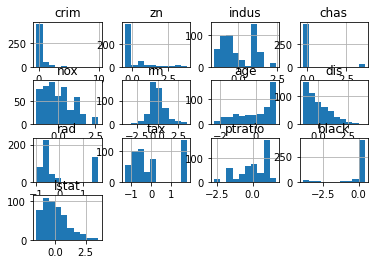

In [7]:
# we look at the distribution of data and its descriptive statistics
dataNormDf.hist()
plt.show()

In [8]:
array = dataNormDf.values
Xs = array[:,0:12]
Ys = array[:,12]

In [9]:
NUM_FEATURES = 5

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=NUM_FEATURES)
fit = rfe.fit(Xs, Ys)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(Xs,Ys)
print("Model Score with selected features is: ", score)

Num Features: 5
Selected Features: [ True False  True False False  True  True False False False False  True]
Feature Ranking: [1 6 1 5 2 1 1 3 4 8 7 1]
Model Score with selected features is:  0.653435327732836


In [10]:
dataNormalDf = pd.DataFrame(normalizedX, columns = X1names)

set_option('display.width', 110)
#set_option('precision', 1)
descriptionNormal = dataNormalDf.describe()
print(descriptionNormal)

             crim          zn       indus        chas         nox          rm         age         dis  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.005070    0.022836    0.018804    0.000129    0.000989    0.011523    0.120675    0.007262   
std      0.011670    0.046848    0.010685    0.000482    0.000189    0.002681    0.048439    0.004588   
min      0.000013    0.000000    0.000963    0.000000    0.000660    0.004682    0.006431    0.001451   
25%      0.000162    0.000000    0.010674    0.000000    0.000872    0.009432    0.086124    0.003299   
50%      0.000496    0.000000    0.017226    0.000000    0.000969    0.011933    0.126160    0.006399   
75%      0.005246    0.024618    0.023876    0.000000    0.001052    0.013348    0.156600    0.010758   
max      0.113081    0.207644    0.061249    0.002371    0.002065    0.018156    0.237626    0.027624   

              rad         tax     ptratio       black 

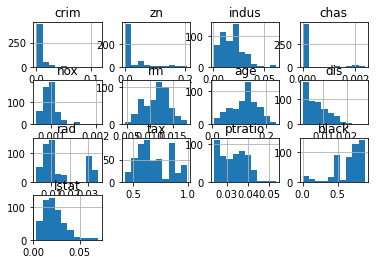

In [11]:
# we look at the distribution of data and its descriptive statistics
dataNormalDf.hist()
plt.show()

In [12]:
array1 = dataNormalDf.values
Xn = array1[:,0:12]
Yn = array1[:,12]

In [25]:
NUM_FEATURES = 10

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=NUM_FEATURES)
fit = rfe.fit(Xn, Yn)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(Xn,Yn)
print("Model Score with selected features is: ", score)

Num Features: 10
Selected Features: [ True False  True  True  True  True  True  True  True  True  True False]
Feature Ranking: [1 3 1 1 1 1 1 1 1 1 1 2]
Model Score with selected features is:  0.5449253152326703
